In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications.resnet50 import ResNet50

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
labels = ['aiplane', 'sutomobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
resnet50 = ResNet50()

- - by default these trainable layers are true that is the weights will not come and will be trained again so we have to make it false to use pre trained weights

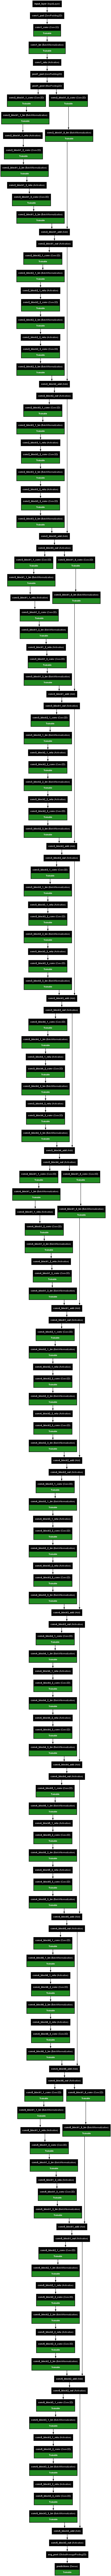

In [7]:
plot_model(resnet50, show_layer_names = True, show_trainable = True)

In [8]:
resnet50.trainable = False

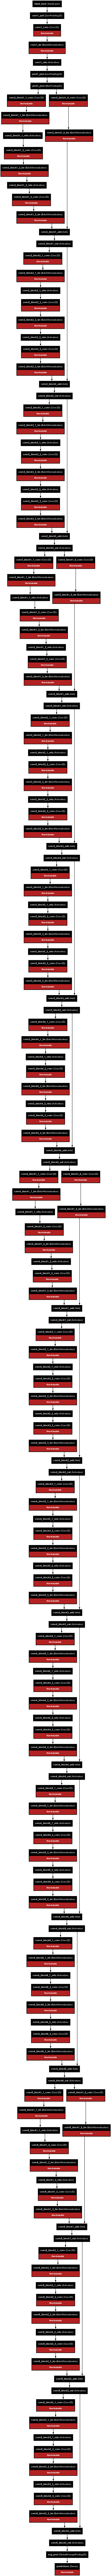

In [9]:
plot_model(resnet50, show_layer_names = True, show_trainable = True)

In [10]:
resnet50 = ResNet50(include_top = False, input_shape = (32, 32, 3))
resnet50.trainable = False

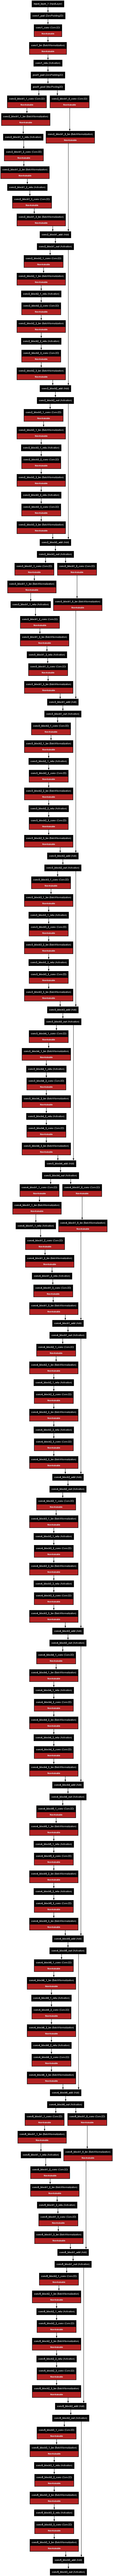

In [11]:
plot_model(resnet50, show_layer_names = True, show_trainable = True)

In [12]:
# add the flatten layer

flattened = tf.keras.layers.Flatten()(resnet50.output)

# fully connected layer
fc1 = tf.keras.layers.Dense(128, activation = 'relu', name = 'ADdedDense1')(flattened)

# fully connected layer

fc2 = tf.keras.layers.Dense(10, activation = 'relu', name = 'AddedDense2')(fc1)

In [13]:
model = tf.keras.Model(inputs = resnet50.inputs, outputs = fc2)

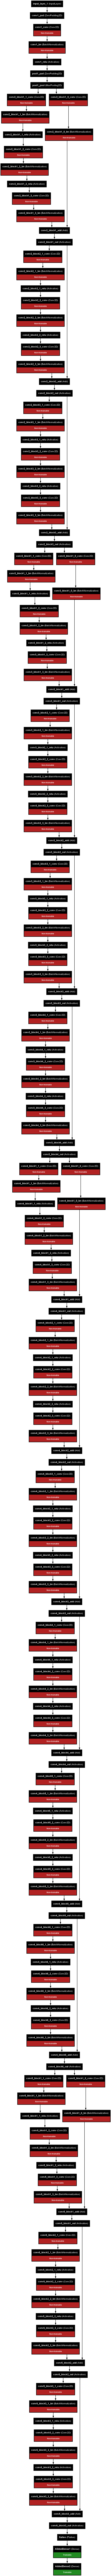

In [14]:
plot_model(model, show_layer_names = True, show_trainable=True)

In [15]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [16]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10


C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_177']. Received: the structure of inputs=*
  warnings.warn(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 152s 89ms/step - accuracy: 0.1012 - loss: 2.6024
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 89ms/step - accuracy: 0.0971 - loss: 2.3026
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 90ms/step - accuracy: 0.0990 - loss: 2.3026
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 91ms/step - accuracy: 0.0977 - loss: 2.3026
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 92ms/step - accuracy: 0.1015 - loss: 2.3026
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 90ms/step - accuracy: 0.1015 - loss: 2.3026
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 90ms/step - accuracy: 0.0993 - loss: 2.3026
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 90ms/step - accuracy: 0.0998 - loss: 2.3026
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 92ms/step - accuracy: 0.1004 - loss: 2.3026
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 92ms/step - accuracy: 0.0983 - loss: 2.3026
